### Importing Libraries

In [256]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import copy

### fetching dataframe

In [ ]:
magicGammaMain = fetch_ucirepo(id=159)

### Creating copy of the dataframe

In [391]:
magicGamma = copy.deepcopy(magicGammaMain)

### encoding target values

In [392]:
mgdf = magicGamma.data.original
X = magicGamma.data.features
y = magicGamma.data.targets
mgdf["class"] = mgdf["class"].map(lambda x: 1 if x == "g" else 0)
y = y.map(lambda x: 1 if x == "g" else 0)

### describing data

In [393]:
print("Features shape",X.shape)
print("Target shape",y.shape)
mgdf.describe()

Features shape (19020, 10)
Target shape (19020, 1)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [394]:
mgdf

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


### finding correlation between features and target values

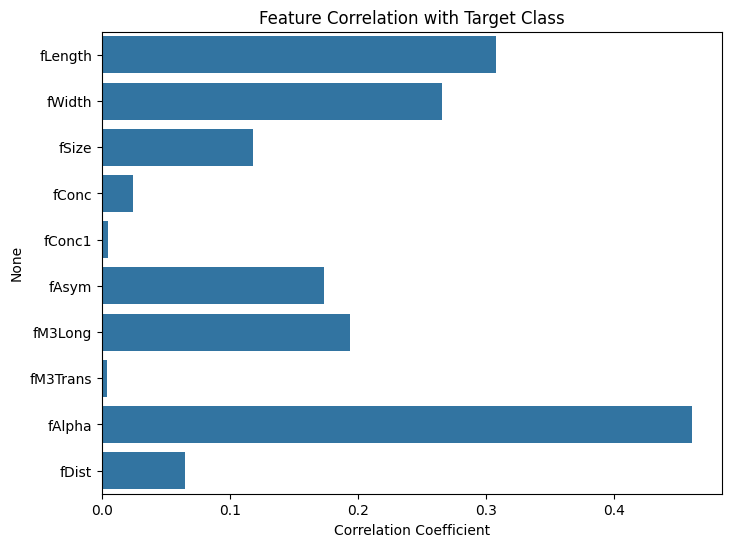

In [395]:
corr = mgdf.corr(numeric_only=True)["class"].abs()
corr = corr.drop("class")

plt.figure(figsize=(8, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Feature Correlation with Target Class")
plt.xlabel("Correlation Coefficient")
plt.show()

### selecting features which have higher correlation that `>=0.02`

In [396]:
selected_features = corr[corr >= 0.02].index.tolist()

print(f"Using {len(selected_features)} features:")
print(selected_features)

X = X[selected_features]
mgdf = mgdf[selected_features + ["class"]]

Using 8 features:
['fLength', 'fWidth', 'fSize', 'fConc', 'fAsym', 'fM3Long', 'fAlpha', 'fDist']


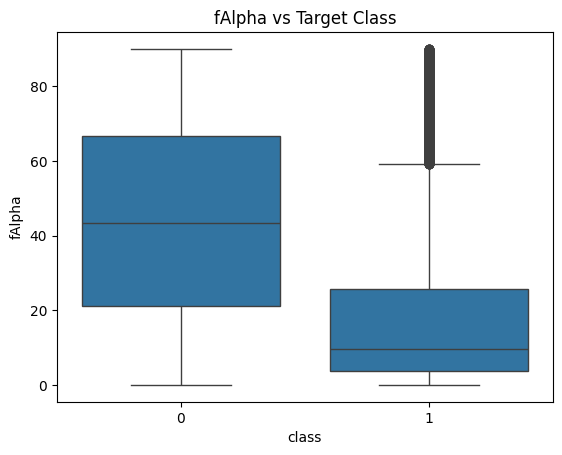

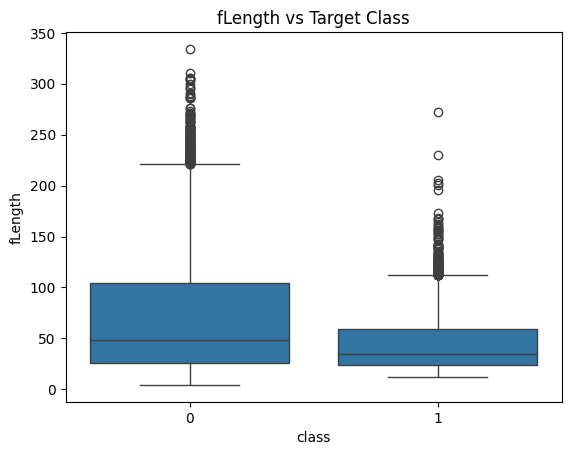

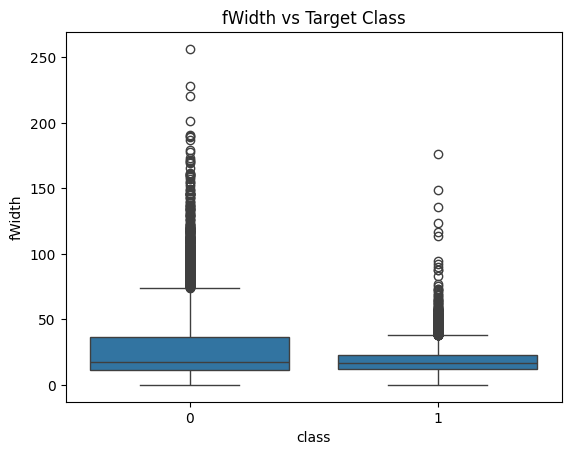

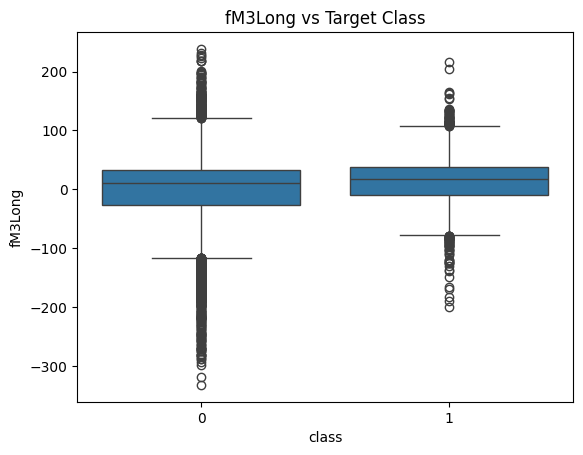

In [397]:
top_features = corr[selected_features].sort_values(ascending=False).head(4).index

for tf in top_features:
    sns.boxplot(x=y["class"], y=X[tf])
    plt.title(f"{tf} vs Target Class")
    plt.show()

### showing class distribution in original data

class
1        12332
0         6688
Name: count, dtype: int64


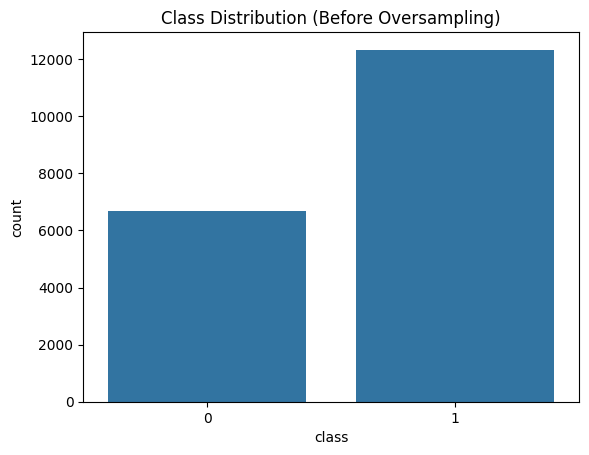

In [398]:
print(y.value_counts())

sns.countplot(x=y["class"])
plt.title("Class Distribution (Before Oversampling)")
plt.show()


### Random oversampling data 

In [399]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y["class"])

class
1    12332
0    12332
Name: count, dtype: int64


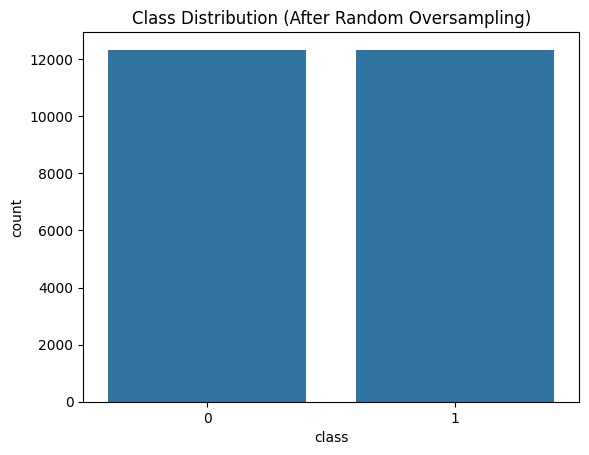

In [400]:
print(pd.Series(y_resampled).value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution (After Random Oversampling)")
plt.show()

### showing correlation

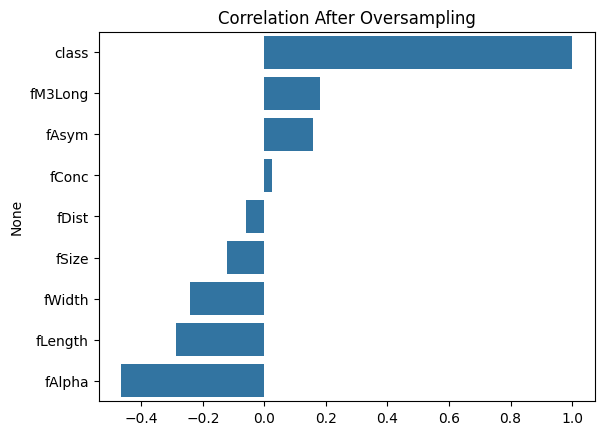

In [401]:
df_resampled = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.Series(y_resampled, name="class")
], axis=1)

corr_resampled = df_resampled.corr()["class"].sort_values(ascending=False)

sns.barplot(x=corr_resampled.values, y=corr_resampled.index)
plt.title("Correlation After Oversampling")
plt.show()
